# Abalone Case Study
Problem Statement: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
ffrom sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#%% import the dataset (Ablone dataset)

df = pd.read_csv('abalone')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
df.notnull().sum()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

<AxesSubplot:>

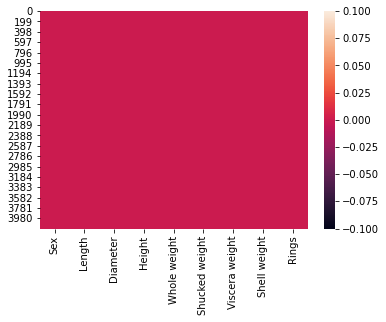

In [5]:
sns.heatmap(df.isnull())

The minimum value in height is zero. There are some zero values in height feature so checking the 'height' feature.

In [6]:
df['Height'].describe()

count    4177.000000
mean        0.139516
std         0.041827
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [7]:
df[df.Height == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are only two rows with zero values. We can remove these two rows from our dataset and consider the rest of the data for the model.

In [8]:
df1=df[df.Height != 0]
df1['Height'].describe()

count    4175.000000
mean        0.139583
std         0.041725
min         0.010000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

In [9]:
df1.shape

(4175, 9)

In [10]:
df1.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [11]:
df1.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df1.skew()

Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Rings                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

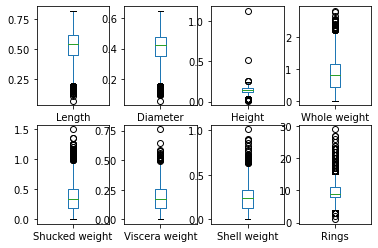

In [13]:
df1.plot(kind="box",subplots=True,layout=(2,4))

in every columns there are lot of outliers present

<AxesSubplot:>

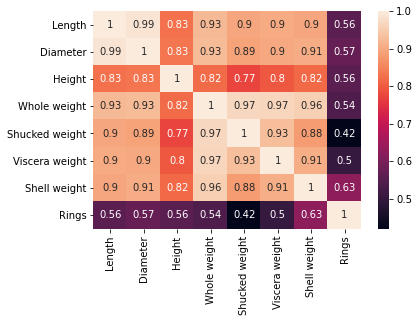

In [14]:
#Checking the correlation
df1.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

Checking for missing values

It is clearly seen that there are no null values in the dataset. Even though it is already described in the dataset description, it is always best to check for null values. Because, sometimes the null values are formed with some row and columns operation done during pre-processing due to the user naivety.

In [15]:
#checking for missing values
df1.isna().sum() 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


From the info printed above, it is evident that there is only one categorical data (Sex) and there are 7 float64 columns and one integer columns. The data description provided earlier is correctly represented in this info.

In [16]:
# dummy columns are created for the categories in Sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1.Sex)
 #the dummy columns are included in df now

Since there are lot of outliers we need to remove them so we need to convert the sex column which is an object type needs to be converted 

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.15167461, 0.57527573, 0.43282928, ..., 0.72680916, 0.63819465,
        1.57107931],
       [1.15167461, 1.4498756 , 1.44081267, ..., 1.20585737, 1.21292621,
        0.91043251],
       [1.28041517, 0.04943846, 0.12156159, ..., 0.35725768, 0.20714599,
        0.29005456],
       ...,
       [1.15167461, 0.63250504, 0.67595246, ..., 0.97495258, 0.49690017,
        0.29005456],
       [1.28041517, 0.8407431 , 0.7767508 , ..., 0.73314729, 0.41069044,
        0.02013442],
       [1.15167461, 1.54875252, 1.48233918, ..., 1.78705336, 1.84033518,
        0.64051238]])

In [18]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1416, 1416, 1417, 1421, 1425, 1426, 1426, 1426, 1427, 1428,
       1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1761, 1761, 1762,
       1762, 1762, 1820, 1981, 1985, 1986, 1986, 2050, 2089, 2107, 2107,
       2113, 2113, 2156, 2160, 2175, 2179, 2198, 2200, 2207, 2208, 2273,
       2274, 2304, 2333, 2333, 2333, 2334, 2343, 2357, 2367, 2380, 2435,
       2458, 2470, 2543, 2622, 2623, 2623, 2623, 2

Data visualization

In [19]:
df1.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

<AxesSubplot:ylabel='Frequency'>

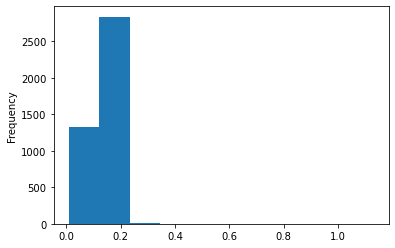

In [20]:
df1["Height"].plot.hist()

In [21]:
from scipy.stats import boxcox
df1["Height"]=boxcox(df1["Height"],0)

<AxesSubplot:ylabel='Frequency'>

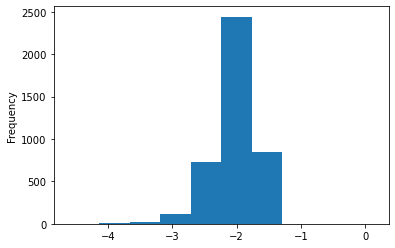

In [22]:
df1["Height"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

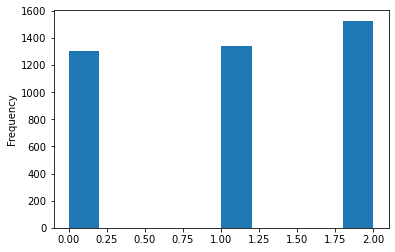

In [23]:
df1["Sex"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

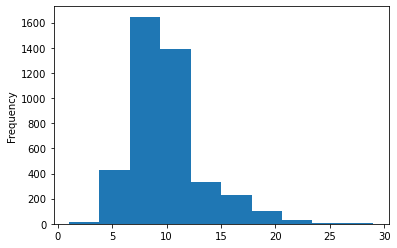

In [24]:
df1["Rings"].plot.hist()

<Figure size 864x720 with 0 Axes>

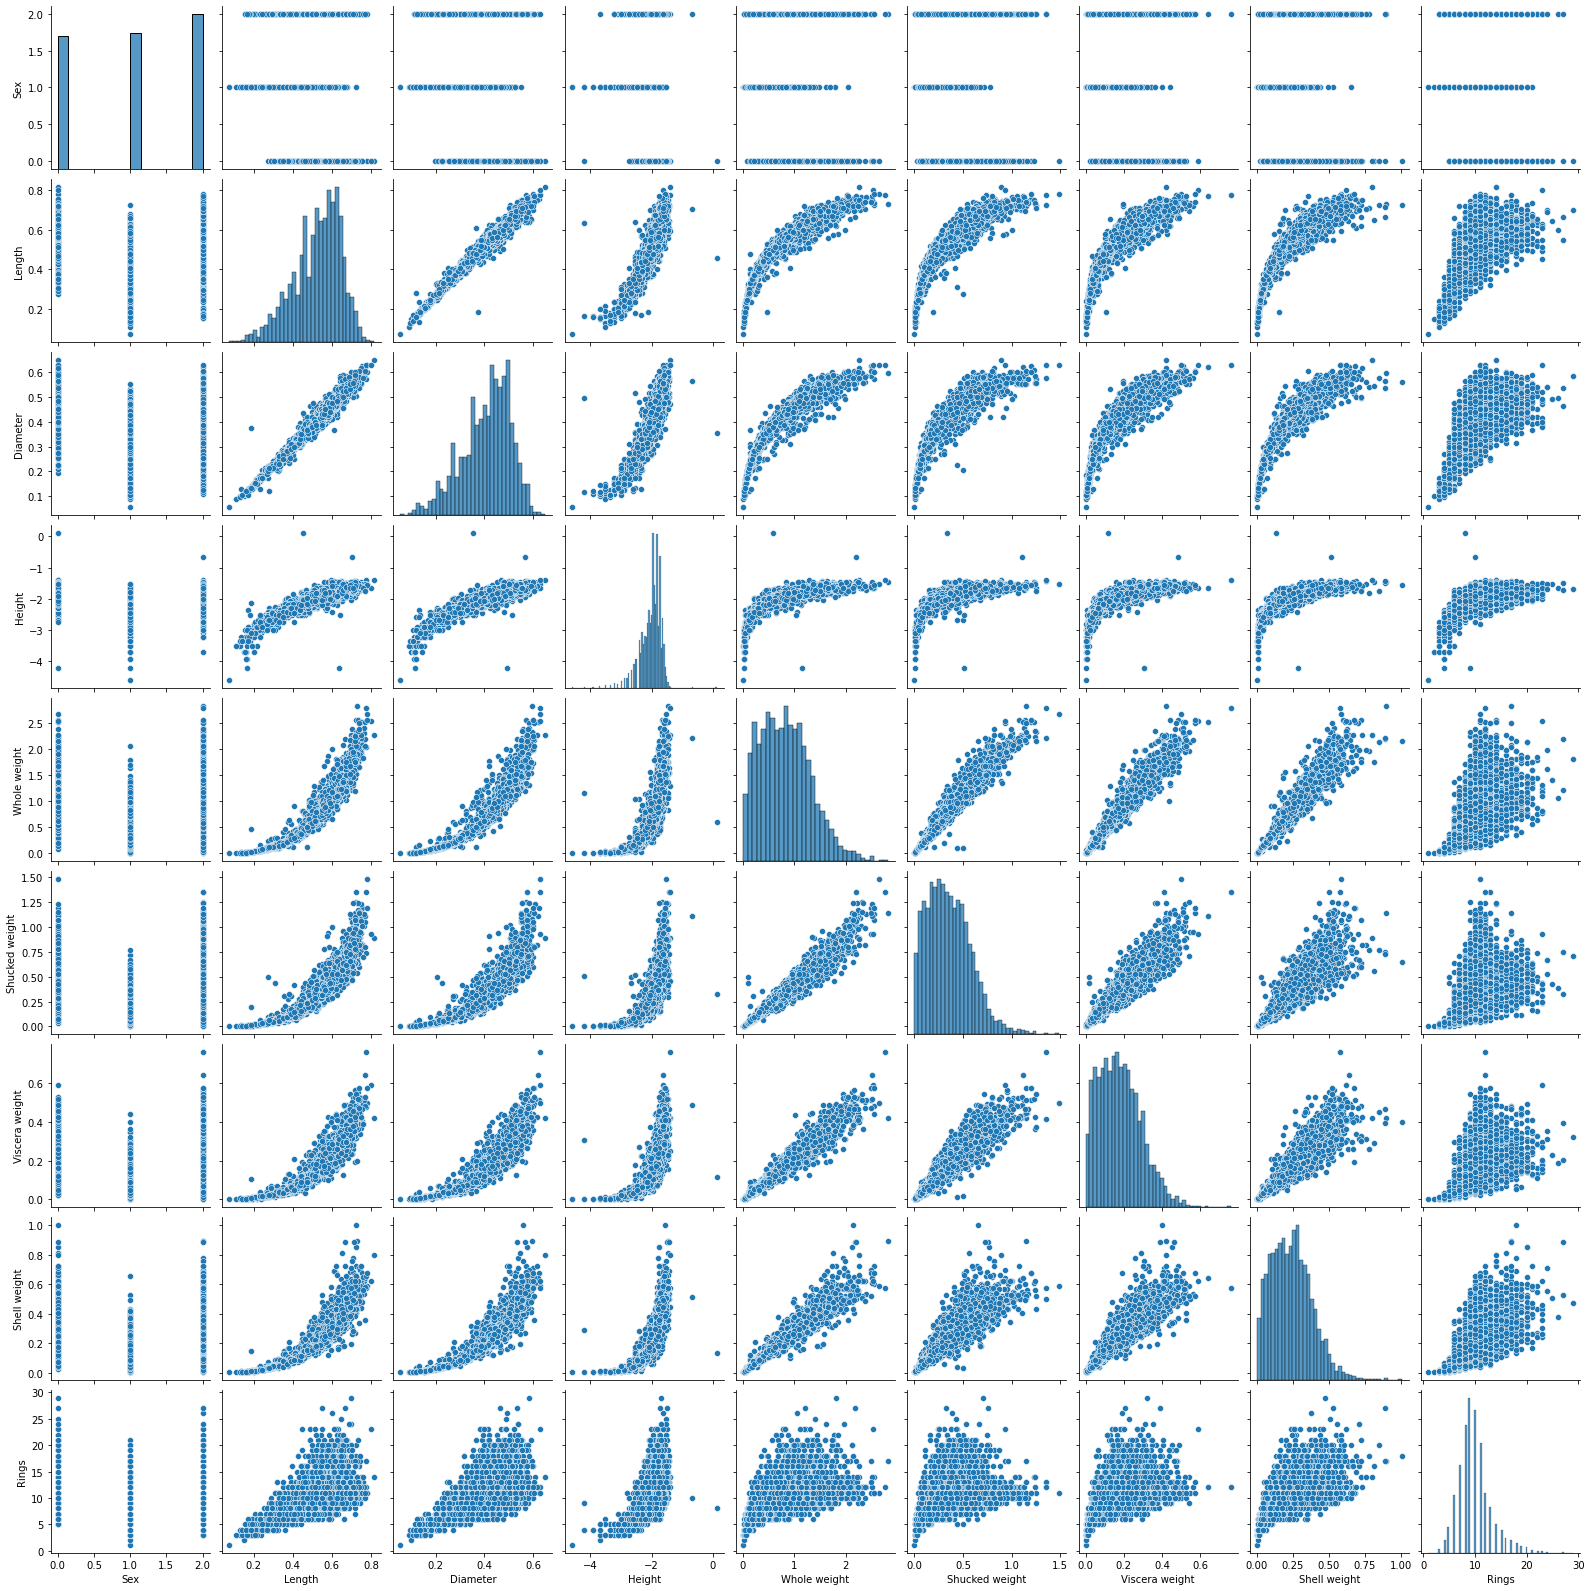

In [25]:
#plotting a pair plot to check
plt.figure(2, figsize = (12, 10))
sns.pairplot(df1)

This plot is generally built in two plots basically, histograms and scatter plot. This gives us valuable insights in the data. This plot can alone serve for full analysis of the data. This pair plot is more informative than the other kind of plots. The plot is shown below.

From the information given by the df.info(), there is one categorical variable(sex). A count plot is plotted to see how the categories are distributed on all the samples.

<AxesSubplot:xlabel='Sex', ylabel='count'>

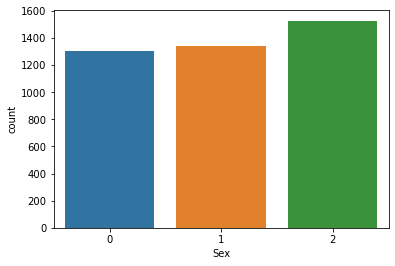

In [26]:
#we have one categorical variable. ('Sex')
#plotting to check how many categories for 'Sex' variable
sns.countplot(df1.Sex)

<Figure size 864x720 with 0 Axes>

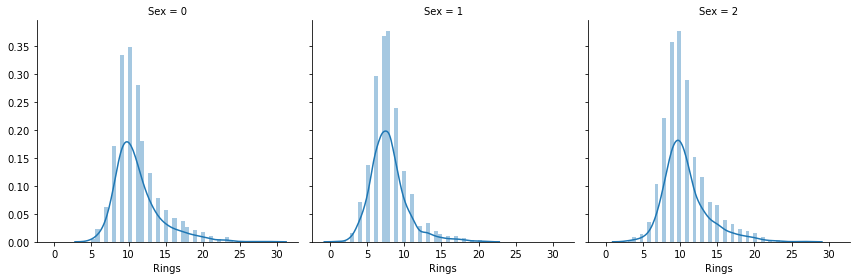

In [27]:
#exploring the sex columns more
plt.figure(3, figsize=(12, 10))
g = sns.FacetGrid(data = df1, col= 'Sex', height = 4)
g.map(sns.distplot, 'Rings')

As mentioned in the description, the age column can be formed by adding number 1.5 to rings feature. This is done and added into the main data frame because, the task is to predict the age. A count plot is drawn to visualize the age distribution on the data.

In [28]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,-1.801810,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,-2.002481,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,-1.584745,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,-1.897120,1.0945,0.5310,0.2610,0.2960,10


In [29]:
df1=df1_new
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,-1.801810,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,-2.002481,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,-1.584745,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,-1.897120,1.0945,0.5310,0.2610,0.2960,10


As mentioned in the description, the age column can be formed by adding number 1.5 to rings feature. This is done and added into the main data frame because, the task is to predict the age. A count plot is drawn to visualize the age distribution on the data.

<AxesSubplot:xlabel='Age', ylabel='count'>

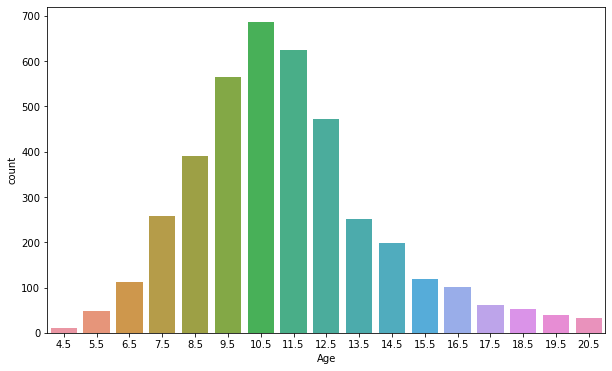

In [30]:
#as per description age = number of rings + 1.5
df1['Age'] = df1.Rings + 1.5
df1['Age'].describe()
#lets check the age plot
plt.figure(4, figsize=(10, 6))
sns.countplot(df1['Age'])

In [31]:
df1['Age'].describe()

count    4027.000000
mean       11.238763
std         2.864691
min         4.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        20.500000
Name: Age, dtype: float64

In [32]:
df1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.055,7,8.5


# Regresssion Model Analysis and Prediction

In [33]:
x=df1.iloc[:,0:-1]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,-1.801810,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,-2.002481,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,-1.584745,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,-1.897120,1.0945,0.5310,0.2610,0.2960,10


In [34]:
y=df1.iloc[:,-1]
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4027, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=33)

In [36]:
x_train.shape

(3141, 9)

In [37]:
x_test.shape

(886, 9)

In [38]:
y_train.shape

(3141,)

In [39]:
y_test.shape

(886,)

In [40]:
from sklearn.linear_model import LinearRegression
im=LinearRegression()

In [41]:
im.fit(x_train,y_train)

LinearRegression()

In [42]:
im.coef_

array([-2.62242850e-16, -3.70713840e-15,  2.40989632e-15,  9.16165525e-16,
        1.34388298e-15, -6.87864643e-16, -5.87753170e-16, -1.59218367e-15,
        1.00000000e+00])

In [43]:
im.intercept_

1.5000000000000018

In [44]:
im.score(x_train,y_train)

1.0

In [45]:
pred=im.predict(x_test)
print("Predicted",pred)
print("actual",y_test)

Predicted [13.5  9.5  9.5 13.5  9.5 10.5  8.5 15.5 14.5  8.5  8.5  9.5 13.5  8.5
 10.5 11.5 17.5  8.5 10.5  9.5 15.5 10.5 10.5 11.5  9.5 10.5  8.5 13.5
  9.5 10.5 11.5 10.5 10.5 11.5 15.5 13.5 10.5  8.5  8.5 11.5 12.5 14.5
  6.5 14.5  9.5  9.5 10.5 10.5 12.5 11.5  9.5 11.5 11.5 10.5 16.5 15.5
 13.5 14.5 15.5 18.5 11.5 10.5  8.5 11.5 10.5  9.5 10.5  5.5 11.5 11.5
 11.5  8.5  7.5 12.5  9.5 10.5 15.5 20.5  9.5  8.5 14.5 10.5 11.5 13.5
  6.5 11.5 11.5 10.5  7.5  7.5 12.5 16.5  6.5 10.5 10.5 14.5  8.5 13.5
 10.5 13.5 14.5 19.5  9.5 11.5 11.5 10.5 12.5  7.5 12.5 12.5 13.5 10.5
 13.5 10.5 10.5 10.5 11.5  9.5 10.5 12.5 10.5  8.5 11.5  5.5 10.5 14.5
 15.5  9.5 14.5 10.5 12.5 11.5  9.5  9.5  9.5 12.5  8.5 12.5  9.5 12.5
 14.5 10.5  9.5  7.5 10.5 12.5 14.5 16.5 11.5  9.5 11.5 11.5  7.5 10.5
  5.5 15.5  9.5 12.5 10.5  6.5  8.5 11.5  7.5  5.5 16.5  8.5 12.5  9.5
 12.5 13.5 19.5  9.5 10.5 11.5  9.5  9.5 12.5  9.5  6.5 12.5  9.5 19.5
  8.5 10.5 11.5 18.5 11.5 11.5  9.5  7.5 15.5  9.5 10.5  9.5  8.5 1

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("error:")
print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean absolute error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 7.297899430493128e-16
mean absolute error: 1.273217939577931e-30
root mean squared error: 1.128369593518866e-15


In [47]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

1.0


In [48]:
t=np.array([2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.070,7])
t.shape

(9,)

In [49]:
t=t.reshape(1,-1)
t.shape

(1, 9)

In [50]:
im.predict(t)

array([8.5])

In [51]:
m=np.array([2,0.710,0.555,-1.634756,1.9485,0.9455,0.3765,0.4950,12])
m.shape
m=m.reshape(1,-1)
m.shape
im.predict(m)

array([13.5])

# Classification Model
The classification model used here is Support Vector Machine. The SVM Classifier algorithm finds a hyperplane in n dimensional space(n is number of features) which classify the data points distinctly.

In [52]:
df1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,-1.801810,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,-2.002481,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,-1.584745,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,-1.897120,1.0945,0.5310,0.2610,0.2960,10,11.5


In [53]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,-1.801810,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,-2.002481,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,-1.584745,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,-1.897120,1.0945,0.5310,0.2610,0.2960,10


Classificaation Model

In [54]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.055,7


In [55]:
X=x.iloc[:,1:9]
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,-2.353878,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,-2.407946,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,-2.002481,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,-2.079442,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,-2.525729,0.2050,0.0895,0.0395,0.055,7


In [56]:
y.shape

(4027,)

In [57]:
from sklearn.svm import SVR

svr_ab = SVR(kernel="rbf", degree=3, C=100, epsilon=0.1)
svr_ab.fit(x_train, y_train)

SVR(C=100)

In [58]:
from sklearn.metrics import mean_squared_error

predictions = svr_ab.predict(x_train)
svr_mse = mean_squared_error(y_train, predictions)
svr_rmse = np.sqrt(svr_mse)
print(f"The Root Mean Square Error is {svr_rmse:.2f}")

The Root Mean Square Error is 0.05


In [59]:
predictions = svr_ab.predict(x_test)
svr_mse = mean_squared_error(y_test, predictions)
svr_rmse = np.sqrt(svr_mse)
print(f"The Root Mean Square Error is {svr_rmse:.2f}")

The Root Mean Square Error is 0.05


In [60]:
data = x_test.iloc[:5]
labels = y_test.iloc[:5]

print("Predictions:" ,svr_ab.predict(data))
print("Labels:", list(labels))

Predictions: [13.43571791  9.5381986   9.56490671 13.44376624  9.57149614]
Labels: [13.5, 9.5, 9.5, 13.5, 9.5]


In [65]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr_ab, x, y, cv=10) 
avgScore = scores.mean()
print("The Average Accuracy Score of the model with 10k folds", avgScore)

The Average Accuracy Score of the model with 10k folds 0.9995842333104881
